<a href="https://colab.research.google.com/github/iypc-team/CoLab/blob/master/CV2_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 07/26/2021-1
from __future__ import absolute_import
from IPython.display import clear_output

import glob, os, shutil
from os.path import *

try: 
    from google.colab import drive, files
    from google.colab.patches import cv2_imshow
except Exception as err:
    pass

try: 
    from matplotlib import pyplot as plt
except Exception as err:
    %pip install matplotlib
    from matplotlib import pyplot as plt

try: 
    import cv2
    from cv2 import COLOR_BGR2RGBA
except Exception as err:
    print(err)
    %pip install opencv-python-headless # works.
    # %pip install opencv-contrib-python-headless
    import cv2
    from cv2 import COLOR_BGR2RGBA, IMREAD_UNCHANGED

import numpy as np

if exists('/content/sample_data'):
    shutil.rmtree('/content/sample_data')

contentPth = os.getcwd()
tensorflowImagesPath = join(contentPth, 'TensorflowImages')
resizedImagesPath = join(contentPth, 'TensorflowResizedImages')

if exists(resizedImagesPath):
    pass
    shutil.rmtree(resizedImagesPath)

try:
    drive.flush_and_unmount()
    drive.mount('/content/gdrive/', force_remount=True)
    mydrivePth = '/content/gdrive/MyDrive'
    os.chdir(mydrivePth)
    gdriveTFImagesPth = join(mydrivePth, 'TensorflowImages')
    gdriveResizedImagesPth = join(mydrivePth, 'TensorflowResizedImages')
    
    os.chdir(mydrivePth)
    from TarfileFunctions import *
    from BashColors import C
    
    if not exists(tensorflowImagesPath):
        shutil.copytree(gdriveResizedImagesPth, tensorflowImagesPath)
        # tff.listTarfiles()
        os.chdir(contentPth)
        # tff.extractTarfiles('Juno_Original_Images.tar.gz')

    gdrive_resized_images = '/content/gdrive/MyDrive/TensorflowResizedImages'
    if not exists(resizedImagesPath): # and not exists(resizedImagesPath):
        # print('from:', gdrive_resized_images)
        # print('to:', resizedImagesPath)
        try: shutil.copytree(gdrive_resized_images, resizedImagesPath)
        except Exception as err:
            print(err)

    os.chdir(contentPth)

except Exception as err:
    # print(err)
    os.chdir(contentPth)
    from TarfileFunctions import *
    from BashColors import C
    tarfilePath=join(contentPth, 'Juno_Original_Images.tar.gz')
    if exists(tarfilePath) and not exists(tensorflowImagesPath):
        tff.extractTarfiles('Juno_Original_Images.tar.gz')

rootPth = expanduser("~")

os.chdir(contentPth)
print(f'cv2: {C.IBlue}{cv2.__version__}{C.ColorOff}')
print(f'cwd: {C.IBlue}{os.getcwd()}')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive/
cv2: 4.1.2
cwd: /content


In [11]:
os.chdir(tensorflowImagesPath)
imageGlob = glob.glob('**', recursive=True)
pathList=[]
count=0
for path in sorted(imageGlob):
    fullPath = abspath(path)
    if isfile(path):
        pathList.append(fullPath)
        print(count, fullPath)
        count+=1

0 /content/TensorflowImages/Enemy/enemy_1.png
1 /content/TensorflowImages/Enemy/horz_flip_enemy_1.png
2 /content/TensorflowImages/Enemy/vert_flip_enemy_1.png
3 /content/TensorflowImages/Friendly/friendly_10.png
4 /content/TensorflowImages/Friendly/friendly_11.png
5 /content/TensorflowImages/Friendly/friendly_2.png
6 /content/TensorflowImages/Friendly/friendly_3.png
7 /content/TensorflowImages/Friendly/friendly_4.png
8 /content/TensorflowImages/Friendly/friendly_6.png
9 /content/TensorflowImages/Friendly/friendly_8.png
10 /content/TensorflowImages/Friendly/friendly_9.png
11 /content/TensorflowImages/Friendly/horz_flip_friendly_10.png
12 /content/TensorflowImages/Friendly/horz_flip_friendly_11.png
13 /content/TensorflowImages/Friendly/horz_flip_friendly_2.png
14 /content/TensorflowImages/Friendly/horz_flip_friendly_3.png
15 /content/TensorflowImages/Friendly/horz_flip_friendly_4.png
16 /content/TensorflowImages/Friendly/horz_flip_friendly_6.png
17 /content/TensorflowImages/Friendly/horz_

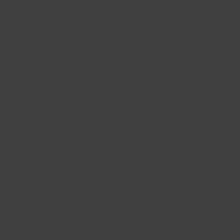

shape: (224, 224, 4)


In [23]:
bgImagePath = pathList[27]
zeroPx = [64,64,64,255]
bgImage = cv2.imread(bgImagePath, cv2.IMREAD_UNCHANGED)
for px in bgImage:
    bgImage[:] = zeroPx
plt.imshow(bgImage)
type(bgImage)
cv2_imshow(bgImage)
cv2.waitKey(500)
cv2.destroyAllWindows()

print(f'shape: {bgImage.shape}')

(224, 224, 3)


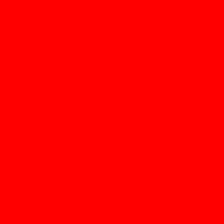

<class 'numpy.ndarray'>


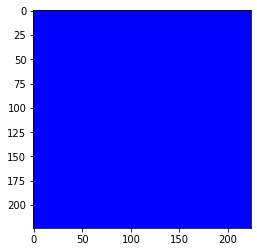

In [ ]:
def create_blank(width, height, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color
    return image

# Create new blank 300x300 blue image
width1, height1 = 224, 224
blue = (255, 0, 0)
image = create_blank(width1, height1, rgb_color=blue)

try:
    print(image.shape)
    cv2_imshow(image)
    plt.imshow(imagep)

except: plt.imshow(image)
print(type(image))
cv2.imwrite('blue.jpg', image)

try:
    cv2.waitKey(0)
    cv2.destroyAllWindows()
except: pass


<class 'numpy.ndarray'>


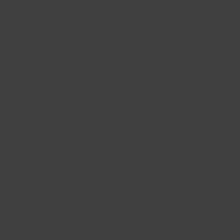

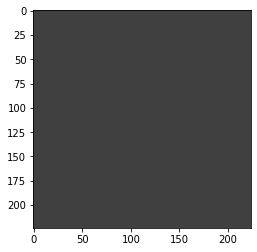

In [ ]:
def create_blank(width, height, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color
    return image

# Create new blank 300x300 gray image
width1, height1 = 224, 224
gray = (64,64,64)
image = create_blank(width1, height1, rgb_color=gray)
try: cv2.imshow(image)
except: plt.imshow(image)
print(type(image))
savePath= join(contentPth, 'gray.jpg')
cv2.imwrite(savePath, image)
img = cv2.imread(savePath)
try:
    cv2.waitKey(0)
    cv2.destroyAllWindows()
except: pass
cv2_imshow(img)

In [ ]:
bgPath = join(contentPth, 'gray.png')

img = cv2.imread(bgPath)
newImg = cv2.getThreadNum()
newImg

1694799744